<a href="https://colab.research.google.com/github/JRSmiffy/TensorFlow-Practise/blob/master/MNIST_Basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST Basic Approach (Softmax)

In [0]:
import tensorflow as tf

In [0]:
from tensorflow.examples.tutorials.mnist import input_data

In [63]:
mnist = input_data.read_data_sets("MNIST_data/",one_hot=True) # now data will already be one hot encoded

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [64]:
mnist.train.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [0]:
import matplotlib.pyplot as plt

In [0]:
%matplotlib inline

In [0]:
single_image = mnist.train.images[400].reshape(28,28)

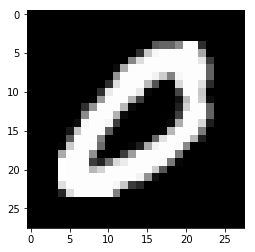

In [217]:
plt.imshow(single_image, cmap='gist_gray')

In [0]:
# PLACEHOLDER

In [0]:
x = tf.placeholder(tf.float32,shape=[None,784])

In [0]:
# VARIABLES

In [0]:
w = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

In [0]:
# GRAPH OPERATIONS

In [0]:
y = tf.matmul(x,w) + b

In [0]:
# LOSS FUNCTION

In [0]:
y_true = tf.placeholder(tf.float32, [None,10]) # Placeholder

In [0]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels = y_true, logits = y))

In [0]:
# OPTIMIZER
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.5)
train = optimizer.minimize(cross_entropy)

In [0]:
# CREATE SESSION
init = tf.global_variables_initializer()

In [0]:
saver = tf.train.Saver()

In [127]:
with tf.Session() as sess:
  
  sess.run(init)
  
  for step in range(1000):
    
    batch_x, batch_y = mnist.train.next_batch(100)
    
    sess.run(train, feed_dict={x:batch_x, y_true:batch_y})
  
    
  # EVALUATE MODEL
  correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_true,1))
  
  # [True, False, False, ...] ---> [1,0,0,...]
  acc = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
  
  print(sess.run(acc, feed_dict={x:mnist.test.images, y_true:mnist.test.labels}))
  
  saver.save(sess,'models/mnist_basic.ckpt')
    

0.9154


In [0]:
### Now I want to give it a test run
# Save and Restore the model
# Pass in the column vector (784,1) 
# Have TF spit out the correct digit 

# Photo process:
# Take photo on phone, convert to grayscale, convert to 28px x 28px, convert to grid of grayscale values between 0 and 1, then convert to column vector

In [83]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import matplotlib.image as img
image = img.imread('/content/drive/My Drive/seven.jpg')

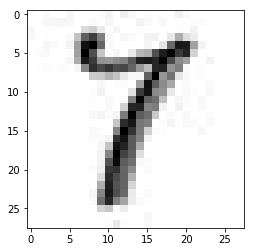

In [98]:
plt.imshow(image, cmap='gist_gray')

In [99]:
print(image.shape)

(28, 28, 3)


In [100]:
print(image[0]) # for each [r g b] -> convert using formula to a single grayscale value

[[252 252 252]
 [255 255 255]
 [250 250 250]
 [255 255 255]
 [255 255 255]
 [247 247 247]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [252 252 252]
 [244 244 244]
 [255 255 255]
 [240 240 240]
 [248 248 248]
 [255 255 255]
 [251 251 251]
 [254 254 254]
 [255 255 255]
 [255 255 255]
 [239 239 239]
 [250 250 250]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]]


In [101]:
image[0][0]

array([252, 252, 252], dtype=uint8)

In [0]:
flat_arr = []
for i in range(0,28):
    for j in range(0,28):
        flat_arr.append(1 - (sum(image[i][j])/ (3*255)))

In [103]:
print(flat_arr)
print(len(flat_arr))

[0.0117647058823529, 0.0, 0.019607843137254943, 0.0, 0.0, 0.03137254901960784, 0.0, 0.0, 0.0, 0.0117647058823529, 0.04313725490196074, 0.0, 0.05882352941176472, 0.027450980392156876, 0.0, 0.015686274509803977, 0.0039215686274509665, 0.0, 0.0, 0.06274509803921569, 0.019607843137254943, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.027450980392156876, 0.03137254901960784, 0.039215686274509776, 0.03137254901960784, 0.0, 0.0, 0.02352941176470591, 0.0, 0.03529411764705881, 0.0, 0.0, 0.0, 0.04705882352941182, 0.02352941176470591, 0.0, 0.027450980392156876, 0.0, 0.0, 0.0039215686274509665, 0.0117647058823529, 0.0117647058823529, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03137254901960784, 0.0, 0.007843137254901933, 0.0, 0.0, 0.0, 0.0, 0.14509803921568631, 0.19215686274509802, 0.07843137254901966, 0.0039215686274509665, 0.039215686274509776, 0.0, 0.0, 0.0117647058823529, 0.0, 0.0, 0.0, 0.0, 0.007843137254901933, 0.0, 0.04705882352941182, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.02352941176470591, 0.0, 0.003921568627

In [149]:
print(type(mnist.train.images[4]))
print(type(flat_arr)) # These two need to be the same

<class 'numpy.ndarray'>
<class 'list'>


In [0]:
import numpy as np

In [0]:
correct_input = np.asarray(flat_arr, dtype=np.float32)

In [150]:
type(correct_input)
print(correct_input.shape)
print(mnist.train.images[4].shape)


(1, 784)
(784,)


In [0]:
correct_input = correct_input.reshape(784,)

In [152]:
print(correct_input.shape)

(784,)


In [0]:
# Now we have 784 pixels between (0,1) that represent our seven.

0.9169
(784, 10)
(10,)
[0.0006002293666824698, 0.16043692827224731, 0.324729859828949, 0.2322276085615158, 5.156536644790322e-06, 0.015792017802596092, 0.001735102036036551, 0.0003341029805596918, 0.2635819911956787, 0.0005569859640672803]
0.324729859828949
2


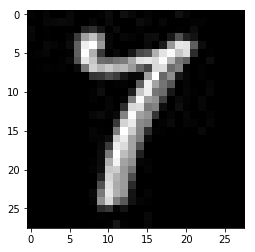

In [248]:
with tf.Session() as sess:
  sess.run(init)
  for step in range(1000):
        batch_x, batch_y = mnist.train.next_batch(100)
        sess.run(train, feed_dict={x:batch_x, y_true:batch_y})
  
  # EVALUATE MODEL
  correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_true,1))
  
  # [True, False, False, ...] ---> [1,0,0,...]
  acc = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
  
  print(sess.run(acc, feed_dict={x:mnist.test.images, y_true:mnist.test.labels}))
  
  
  
  
  # New Code
  print(w.shape)  # (784, 10)
  print(b.shape)  # (10,)
  
  z_probabilities = np.matmul(correct_input, w) + b  # z = tf.matmul(X, W) + b
  
  from sklearn.utils.extmath import softmax
    
  ans = softmax([z_probabilities])
  
  ans = ans.tolist()
  
  ans = ans[0]
  
  print(ans)
    
  print(max(ans))
    
  print(round(ans.index(max(ans))))
  
  plt.imshow(correct_input.reshape(28,28), cmap='gist_gray')
  